In [1]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_experiments(data, labels, title, best_value, ylim=None):
    num_iterations = 100
    t = torch.linspace(0, num_iterations, num_iterations + 1)

    b = 2
    for i, algo in enumerate(labels):
        label = labels[algo][0]
        color = labels[algo][1]

        utility = torch.log(best_value - data["all_set_utilities"][algo])[
            :, : num_iterations + 1
        ]
        mean_utility = utility.mean(dim=0)
        std_utility = utility.std(dim=0)
        plt.plot(t, mean_utility, label=label, linewidth=4, color=color)
        plt.fill_between(
            t,
            mean_utility + b * std_utility,
            mean_utility - b * std_utility,
            alpha=0.15,
            color=color,
            edgecolor="w",
            linewidth=3,
        )
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(0, num_iterations)
    plt.xticks(np.linspace(0, num_iterations, 6), fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title, fontsize=30)
    plt.grid(alpha=0.5)
    return None

In [3]:
algo = {
    "sobol": ["Sobol", "black"],
    "r2": [r"R2", "orange"],
    "hv": [r"HV", "dodgerblue"],
    "igd": [r"IGD+", "crimson"],
    "d1": ["D1", "mediumseagreen"],
}

In [4]:
utils = ["r2", "hv", "igd", "d1"]

problem_name = "vehicle"
data = [torch.load(f"data/{problem_name}/{util}.pt") for util in utils]
best = [-0.0, 0.9, 0.0, 0.0]

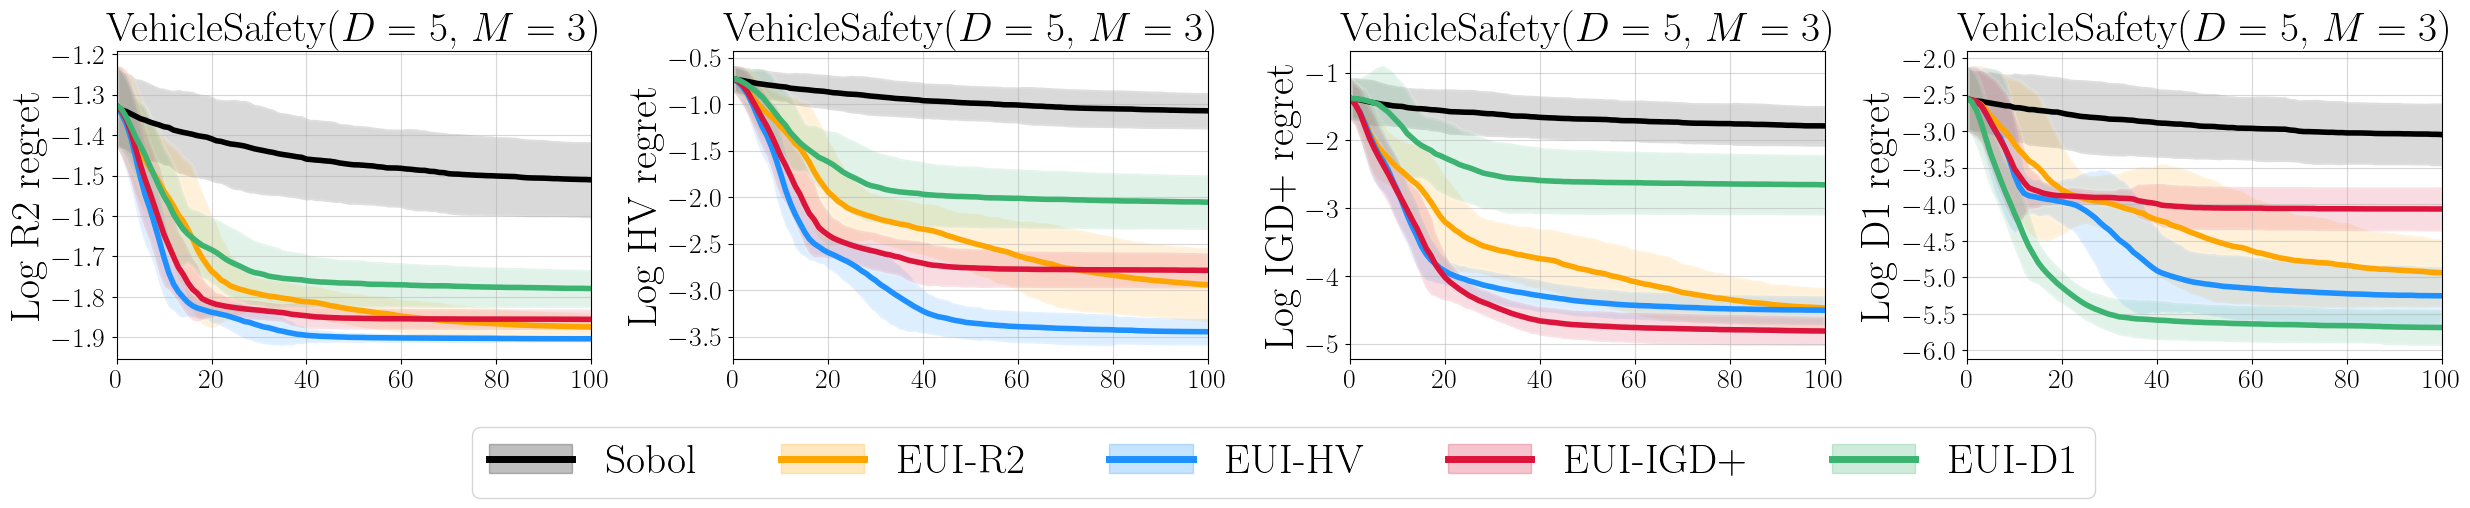

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(30, 4))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.30, hspace=0.16
)
#################################################
# Rocket
for i, util in enumerate(utils):
    plt.subplot(1, 4, 1 + i)
    plot_experiments(
        data=data[i],
        title="VehicleSafety($D=5$, $M=3$)",
        labels=algo,
        best_value=best[i],
        ylim=None,
    )
    plt.ylabel(f"Log {algo[util][0]} regret", fontsize=30)
#################################################
black_line = mlines.Line2D([], [], color="black", linestyle="-", linewidth=5)
black_patch = mpatches.Patch(color="black", alpha=0.25)

blue_line = mlines.Line2D([], [], color="dodgerblue", linestyle="-", linewidth=5)
blue_patch = mpatches.Patch(color="dodgerblue", alpha=0.25)

green_line = mlines.Line2D([], [], color="mediumseagreen", linestyle="-", linewidth=5)
green_patch = mpatches.Patch(color="mediumseagreen", alpha=0.25)

red_line = mlines.Line2D([], [], color="crimson", linestyle="-", linewidth=5)
red_patch = mpatches.Patch(color="crimson", alpha=0.25)

orange_line = mlines.Line2D([], [], color="orange", linestyle="-", linewidth=5)
orange_patch = mpatches.Patch(color="orange", alpha=0.25)

labels = ["Sobol", "EUI-R2", "EUI-HV", "EUI-IGD+", "EUI-D1"]

axes[0].legend(
    handles=[
        (black_line, black_patch),
        (orange_line, orange_patch),
        (blue_line, blue_patch),
        (red_line, red_patch),
        (green_line, green_patch),
    ],
    labels=labels,
    loc=(0.75, -0.45),
    ncol=5,
    fontsize=30,
)
plt.show()